# Pensamientos y Muertes

### Este programa está diseñado para calcular la probabilidad de que una persona A piense/sienta algo sobre otra persona B y la persona B muera en ese mismo instante

### Primero partiremos introduciendo los datos básicos de población. 
1. Sabemos que hay 7,5 Giga humanos
2. Sabemos que 25% de los humanos son menores de 15 años [1]
3. Sabemos que al menos 10% de las personas tienen enfermedades mentales [2]
4. Sabemos que al menos 10% de las personas con enfermedades mentales son niños de 14 años o menos [8]

Para hacer este cálculo se tendrán que hacer algunas suposiciones:
1. La mitad de la población está despierta en un momento dado (ya que la mitad del mundo tiene sol en un momento dado)
2. Vamos a sacar a personas con enfermedades mentales y a menores de 15, así no tenemos cosas como "se lo puede haber imaginado".

In [46]:
#Importamos librería para plotear y para calcular
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


In [47]:
def poblacion_usable(poblacion):
    awake     = poblacion / 2
    menores   = awake * 0.25
    enfermos  = awake * (0.1-0.01)
    usables   = awake - menores - enfermos # sacamos a los enfermos mentales y a los cabros chicos
    print('La cantidad de población conciente en un dado momento sin problemas mentales y mayor a 15 años es ', usables)
    return usables

poblacion = 7594000000
usables = poblacion_usable(poblacion)

La cantidad de población conciente en un dado momento sin problemas mentales y mayor a 15 años es  2506020000.0


### Establecemos la tasa de ocurrencia
Se necesita saber cuántas veces al año una persona tiene un pensamiento u emoción fuerte asociado a alguien que conozca, a esto le llamaremos "la sensación"
Para esto se le pedirá al usuario que introduzca cuantas veces al año ocurre "la sensación"

In [48]:
tasa_anual = float(input('¿Cuántas veces al año ocurre la sensación? '))
tasa_diaria = (usables*tasa_anual)/365
tasa_hora = tasa_diaria /24
tasa_minuto = tasa_hora / 60
tasa_segundo = tasa_minuto / 60
print('Cantidad de personas piensan o tienen una emoción fuerte asociada a alguien que conocen (truncado sin decimal):')
print('En cada día     :',int(tasa_diaria))
print('En cada hora    :',int(tasa_hora))
print('En cada minuto  :',int(tasa_minuto))
print('En cada segundo :',int(tasa_segundo))

¿Cuántas veces al año ocurre la sensación? 30
Cantidad de personas piensan o tienen una emoción fuerte asociada a alguien que conocen (truncado sin decimal):
En cada día     : 205974246
En cada hora    : 8582260
En cada minuto  : 143037
En cada segundo : 2383


### Algunos datos extra a considerar
1. A lo largo de 80 años una persona conoce en promedio unas 5000 pesonas en total. [3]
2. Una persona cualquiera conoce en general a 535 personas. [4]
3. persona cualquiera tiene en general 150 relaciones "cercanas" [5]
4. Al día mueren 147118 personas [6]
5. La esperanza de vida promedio mundial es de 72 años [7]

A continuación se deberá calcular la probabilidad de que el evento le ocurra a una persona cualquiera y la probabilidad de que le ocurra a al menos 1 conocido de una persona cualquiera, esto según los 3 datos de grupos de conocidos.

Para esto hay que tener en cuenta la siguiente ecuación


\begin{equation}
P\{\text{Ocurra una vez en N}\} = 1 - (1-p)^{N}
\end{equation}
Donde $P$ es la probabilidad de que algo ucirra al menos una vez de N ocaciones y  $p$ es la probabilidad de que ocurra en una ocación.

### Por ejemplo veamos la probabilidad de que en un dado de 6 caras lanzado 4 veces salga al menos una vez el 3

La probabilidad de obtener el 3 al lanzar un dado es de $\frac{1}{6}$, osea 1 de cada 6 veces. Pero si lanzo el dado 10 veces entonces la ecuación quedará

\begin{equation}
P\{\text{Ocurra una vez en 10}\} = 1 - (1-\frac{1}{6})^{10}
\end{equation}

cuyo resultado es:

In [49]:
print(  1-((1-(1/6))**10)  )

0.8384944171101543


In [50]:
#Agreamos datos
muertes = 147118
grupos         = [150,536,5000]
letras         = ['A (150 conocidos)','B (536 conocidos)','C (5000 conocidos)']

### Aplicando a nuestro caso
Basandonos en la ecuacion anteior y probabilidad básica tenemos las siguientes ecuaciones
1. La probabilidad de que alguien piense en otra persona y esa persona muera ese mismo día está dada por:

\begin{eqnarray}
Prob_{ocurre} = \frac{S}{U}\cdot\frac{M}{Pob}
\end{eqnarray}

Donde $S$ es la cantidad de personas que en un día cualquiera tienen "la sensación", $U$ es la cantidad de población disponible para que eso ocurra (despiertos, conscientes, etc), $M$ es la candtidad de muertes diarias y $Pob$ es la población mundial

2. La probabilidad de que esta situación le ocurra a una persona particular a lo largo de su vida es:

\begin{equation}
Prob_{persona} = 1-\left( 1-\frac{M}{Pob} \right)^{\left( \text{Tasa}\cdot\text{Edad} \right)}
\end{equation}

Donde $Tasa$ es la cantidad de veces que la sensación le ocurre a alguien en un año 

3. La probabilidad de que esta situación le ocurra a almenos 1 conocido de alguien a lo largo de su vida es:

\begin{equation}
Prob_{conocido} = 1-\left( 1-Prob_{persona} \right)^{\left(Conocidos\right)}
\end{equation}

In [51]:
#Definimos funcións para calcular las ecuaciones anteriores y otros datos interesantes

def tasa_real(grupo, letra, tasa_diaria, usables,muertes):
    prob_ocur_persona = 1-(1- muertes/poblacion)**(tasa_anual*72)
    prob_amigos = 1-(1-prob_ocur_persona)**(grupo)
    
    prob_ocur_persona_h = 1-(1- (muertes/24)/poblacion)**(tasa_anual*72)
    prob_amigos_h = 1-(1-prob_ocur_persona_h)**(grupo)
    
    prob_ocur_persona_m = 1-(1- (muertes/24/60)/poblacion)**(tasa_anual*72)
    prob_amigos_m = 1-(1-prob_ocur_persona_m)**(grupo)
    
    prob_ocur_persona_s = 1-(1- (muertes/24/60/60)/poblacion)**(tasa_anual*72)
    prob_amigos_s = 1-(1-prob_ocur_persona_s)**(grupo)
    
    print('---------------------')
    print('Para el grupo',letra)
    print('La probabilidad de que en 72 años conozcas a alguien que le haya ocurrido es ', prob_amigos)
    print('y si queremos que sea exacto a la hora, minuto o segundo? para un conocido que vive hasta los 72 años:')
    print('La probabilidad que sea exacto a la hora es ', prob_amigos_h)
    print('La probabilidad que sea exacto al minuto es ', prob_amigos_m)
    print('La probabilidad que sea exacto al segundo es ', prob_amigos_s)
    print('---------------------')
    
def otros_datos(tasa_diaria, usables,muertes):
    '''
    Dado tasa_diaria, cuantas veces la persona se muere.
    '''
    p_muerte_pensado = (tasa_diaria/usables)*(muertes/poblacion) #probabilidad de que una persona sea pensada y que muera
    prob_ocur_persona = 1-(1-muertes/poblacion)**(tasa_anual*95)
    prob_ocur_persona_h = 1-(1-(muertes/24)/poblacion)**(tasa_anual*95)
    prob_ocur_persona_m = 1-(1-(muertes/24/60)/poblacion)**(tasa_anual*95)
    prob_ocur_persona_s = 1-(1-(muertes/24/60/60)/poblacion)**(tasa_anual*95)
    print('---------------------')
    print('Al día ',p_muerte_pensado*tasa_diaria, ' personas tienen una sensasión sobre alguien que conocen y ese alguien muere')
    print('La probabilidad de que te ocurra a ti aluna vez en 95 años de vida es ', prob_ocur_persona)
    print('y si queremos que sea exacto a la hora, minuto o segundo? para alguien que vive 95 años:')
    print('La probabilidad que sea exacto a la hora es ', prob_ocur_persona_h)
    print('La probabilidad que sea exacto al minuto es ', prob_ocur_persona_m)
    print('La probabilidad que sea exacto al segundo es ', prob_ocur_persona_s)
    print('---------------------')


### Calculamos segun los datos

In [52]:
#Calculamos datos generales:
otros_datos(tasa_diaria,usables,muertes)
#Calculamos por grupo
tasa_real(grupos[0],letras[0],tasa_diaria,usables,muertes)
tasa_real(grupos[1],letras[1],tasa_diaria,usables,muertes)
tasa_real(grupos[2],letras[2],tasa_diaria,usables,muertes)


---------------------
Al día  327.9718221054608  personas tienen una sensasión sobre alguien que conocen y ese alguien muere
La probabilidad de que te ocurra a ti aluna vez en 95 años de vida es  0.053716785736436345
y si queremos que sea exacto a la hora, minuto o segundo? para alguien que vive 95 años:
La probabilidad que sea exacto a la hora es  0.002297891685692277
La probabilidad que sea exacto al minuto es  3.834151454540358e-05
La probabilidad que sea exacto al segundo es  6.390371689590779e-07
---------------------
---------------------
Para el grupo A (150 conocidos)
La probabilidad de que en 72 años conozcas a alguien que le haya ocurrido es  0.9981207618491184
y si queremos que sea exacto a la hora, minuto o segundo? para un conocido que vive hasta los 72 años:
La probabilidad que sea exacto a la hora es  0.23013076749786854
La probabilidad que sea exacto al minuto es  0.004349422122711721
La probabilidad que sea exacto al segundo es  7.264582041965895e-05
------------------

### Graficando...

Vamos a hacer dos graficos, el primero será de la probabilidad de conocer a alguien que le ocurra según la edad que tenemos, el segundo hará lo mismo pero con datos más exactos de cantidad de conocidos en el tiempo obtenidos de [3]

<IPython.core.display.Javascript object>


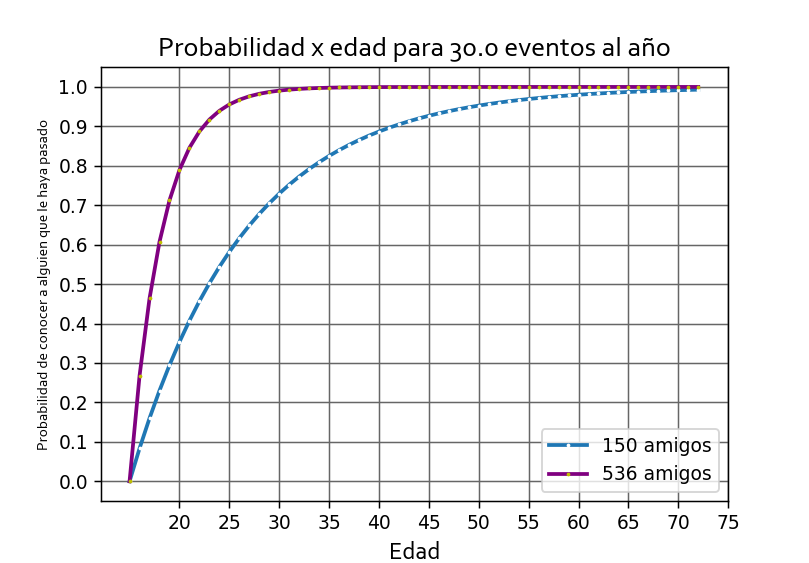

In [71]:
def prob_conocer(edad,grupo,tasa_diaria, usables,muertes):
    '''
    Probabilidad de concoer a alguien que le haya "pasado" (penso en alguien y esa persona murio), en funcion de la edad.
    '''
    prob_ocur_persona = 1-(1-muertes/poblacion)**(tasa_anual*(edad-15))
    prob_amigos = 1-(1-prob_ocur_persona)**(grupo)
    if edad>15:
        return prob_amigos
    else:
        return 0
num=tasa_anual
edades_numero  = [20     , 25    , 30    , 35    , 40    , 45    ,50     , 55    , 60    , 65    , 70    , 75  ]

plt.figure(figsize=(5,3), dpi=150)
plt.plot(range(15,73),[prob_conocer(edad,150,tasa_diaria,usables,muertes) for edad in range(15,73)],label='150 amigos',
         marker='.', linewidth=2, markersize = 2, markeredgecolor = 'w')
plt.plot(range(15,73),[prob_conocer(edad,536,tasa_diaria,usables,muertes) for edad in range(15,73)],label='536 amigos',
        marker='.', linewidth=2, markersize = 2, markeredgecolor = 'y',color='purple')
plt.xlabel('Edad',fontdict={'fontname': 'Corbel', 'fontsize':13})
plt.ylabel('Probabilidad de conocer a alguien que le haya pasado',fontdict={'fontname': 'Corbel', 'fontsize':8})
plt.title('Probabilidad x edad para '+str(num)+' eventos al año', fontdict={'fontname': 'Corbel', 'fontsize':15})
plt.xticks(edades_numero)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.legend()
plt.show()


#### Ahora con los datos más exactos...

<IPython.core.display.Javascript object>


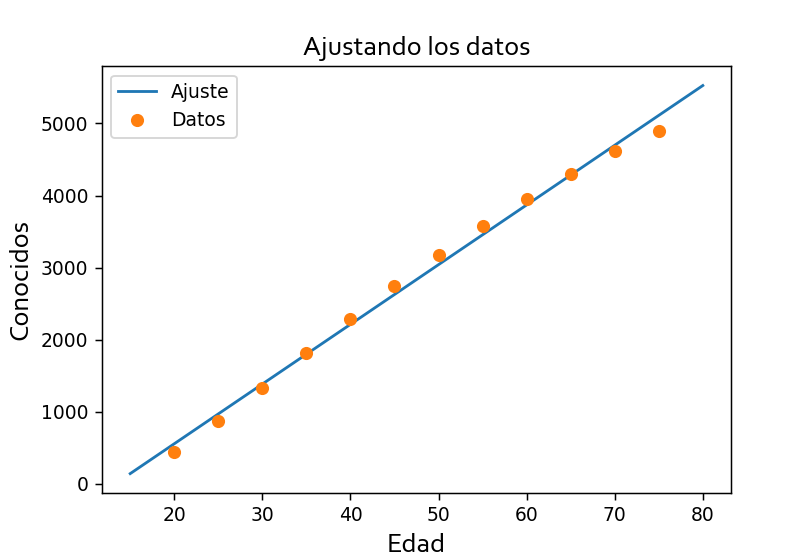

In [72]:
#Sabemos estos datos
edades_string  = ['20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80']
edades_numero  = [20     , 25    , 30    , 35    , 40    , 45    ,50     , 55    , 60    , 65    , 70    , 75  ]
conocidos      = [447    , 875   , 1327  , 1808  , 2282  , 2740  , 3173  , 3581  , 3958  , 4303  , 4611  , 4897]
#Pero también sabemos que la progresión es lineal por lo que muestra el gráfico de [3], por lo que le agregaremos 
#datos a mano para tener una curva más suave en el resultado.
#el rango será desde los 15 hasta los 80 años.

ed  = list(range(15,81))
funcion = np.polyfit(edades_numero,conocidos,1)
con = np.poly1d(funcion)
plt.figure(figsize=(5,3), dpi=150)
plt.xlabel('Edad',fontdict={'fontname': 'Corbel', 'fontsize':15})
plt.ylabel('Conocidos',fontdict={'fontname': 'Corbel', 'fontsize':15})
plt.title('Ajustando los datos',fontdict={'fontname': 'Corbel', 'fontsize':15})
plt.plot(ed,con(ed),label='Ajuste')
plt.plot(edades_numero,conocidos,'o',label='Datos')
plt.legend()
plt.show()

In [55]:
def prob_conocer_2(edad,grupo,tasa_diaria, usables,muertes):
    '''
    Probabilidad de concoer a alguien que le haya "pasado" (penso en alguien y esa persona murio), en funcion de la edad.
    '''
    #Creamos vectores para modificar
    prob_ocur_persona = list(range(0, len(edad)))
    prob_amigos       = list(range(0, len(edad)))
    for i in range(len(edad)):
        prob_ocur_persona[i] = 1-(1-muertes/poblacion)**(tasa_anual*(edad[i]-15))
        prob_amigos[i] = 1-(1-prob_ocur_persona[i])**(grupo[i])
    if edad[0]>=15:
        return prob_amigos
    else:
        return 0
y=prob_conocer_2(edades_numero,conocidos,tasa_diaria,usables,muertes)
num=int(tasa_anual)
y_fit=prob_conocer_2(ed,con(ed),tasa_diaria,usables,muertes)

def prob_conocer_3(edad,grupo, usables,muertes,tasa_anual):
    '''
    Probabilidad de concoer a alguien que le haya "pasado" (penso en alguien y esa persona murio), en funcion de la edad.
    '''
    #Creamos vectores para modificar
    #e = list(range(0, len(edad)))
    #a = list(range(0,len(tasa_anual)))
    prob_ocur_persona = np.zeros( shape=(len(edad),len(tasa_anual)) )  
    prob_amigos       = np.zeros( shape=(len(edad),len(tasa_anual)) )  
    for i in range(len(edad)):
        for j in range(len(tasa_anual)):
            prob_ocur_persona[i,j] = 1-(1-muertes/poblacion)**(tasa_anual[j]*(edad[i]-15))
            prob_amigos[i,j] = 1-(1-prob_ocur_persona[i,j])**(grupo[i])
    return prob_amigos
        


#### Graficamos los cálculos

<IPython.core.display.Javascript object>


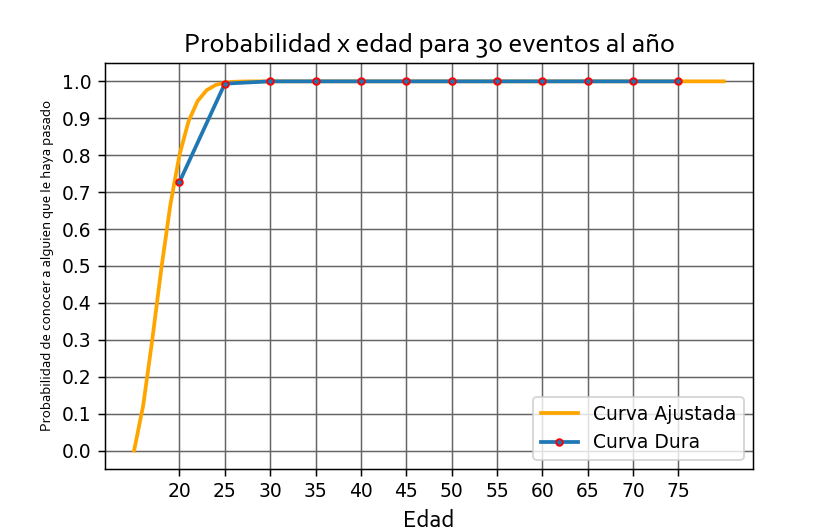

In [56]:
plt.figure(figsize=(5,3), dpi=150)
plt.plot(ed, y_fit , linewidth=2, color= 'orange', label='Curva Ajustada')
plt.plot(edades_numero, y, marker='.', linewidth=2, markersize = 7, markeredgecolor = 'red',label='Curva Dura')
plt.xlabel('Edad',fontdict={'fontname': 'Corbel', 'fontsize':13})
plt.ylabel('Probabilidad de conocer a alguien que le haya pasado',fontdict={'fontname': 'Corbel', 'fontsize':8})
plt.title('Probabilidad x edad para '+str(num)+' eventos al año', fontdict={'fontname': 'Corbel', 'fontsize':15})
plt.xticks(edades_numero)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.legend()
plt.show()

# And for the grand finale
Ahora solo queda hacer un gráfico 3D donde se pueda ver como cambia la probabiliad segun la cantidad de eventos anuales y la edad.

In [57]:
#creamos los vectores que necesitaremos para generar la matriz
tasa_anual_2  = list(range(1,366))
tasa_diaria_2  = list(range(1,366))
for i in range(0,len(tasa_anual_2)):
    tasa_diaria_2 [i] = tasa_anual_2[i]*usables/365

#Generamos la matriz con los resultados
calculo = prob_conocer_3(ed,con(ed), usables,muertes,tasa_anual_2)

<IPython.core.display.Javascript object>


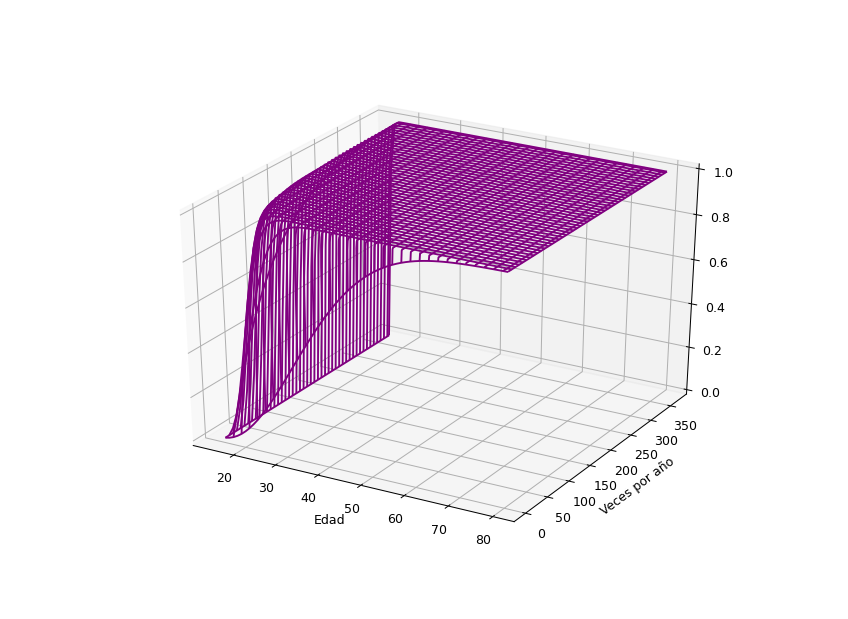

In [73]:
#Ahora a plotear
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

#Generams una grilla sobre la cual exponer los resultados
X,Y = np.meshgrid(ed,tasa_anual_2)
#Transponemos los resultados para que calcen con la grilla
Z=np.transpose(calculo)
plt.xlabel('Edad')
plt.ylabel('Veces por año')
#plt.zlabel('Probabiliad')
#plt.title('Probabilidad por Edad por Eventos al Año')
ax.plot_wireframe(X,Y,Z, color='purple')

#ax.title =('Probabilidad por Edad y por Eventos al Año')
plt.show()



## Referencias

1. https://datos.bancomundial.org/indicador/SP.POP.0014.TO.ZS
2. https://ourworldindata.org/mental-health
3. https://elpais.com/tecnologia/2019/07/09/actualidad/1562709377_124629.html
4. https://observatoriosociallacaixa.org/-/cuantos-conocidos-tenemos
5. https://nationalpost.com/news/world/humans-only-able-to-maintain-five-relationships-in-their-inner-circle-and-150-in-their-outer-circle-study-finds
6. https://www.weforum.org/agenda/2020/05/how-many-people-die-each-day-covid-19-coronavirus/
7. https://www.google.com/search?q=esperanza+de+vida+promedio+mundial&oq=esperanza+de+vida+promedio&aqs=chrome.0.0j69i57j0l6.5203j0j7&sourceid=chrome&ie=UTF-8
8. https://www.mentalhealth.org.uk/statistics/mental-health-statistics-children-and-young-people
